In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
import plotly.express as px
from sklearn.impute import SimpleImputer



In [2]:
# Будем анализировать данные только на обучающей выборке
df = pd.read_csv('/Users/evgeniayurova/Desktop/ML/healthcare-dataset-stroke-data.csv')

In [3]:
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [5]:
draw_missing(df).round(1)

,Total,Percent
bmi,201,3.9
id,0,0.0
gender,0,0.0
age,0,0.0
hypertension,0,0.0
heart_disease,0,0.0
ever_married,0,0.0
work_type,0,0.0
Residence_type,0,0.0
avg_glucose_level,0,0.0


In [6]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 5110


# Обработка пропусков в числовых данных

In [7]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка bmi. Тип данных float64. Количество пустых значений 201, 3.93%.


In [8]:
# Фильтр по колонкам с пропущенными значениями
data_num = df[num_cols]
data_num

,bmi
0,36.6
1,NaN
2,32.5
3,34.4
4,24.0
...,...
5105,NaN
5106,40.0
5107,30.6
5108,25.6


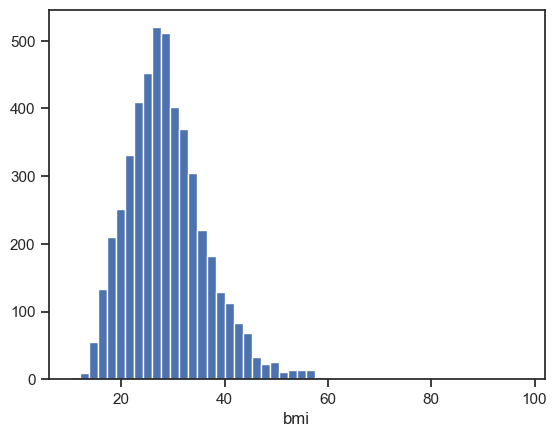

In [9]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(df[col], 50)
    plt.xlabel(col)
    plt.show()

In [10]:
data_num_bmi = data_num[['bmi']]
data_num_bmi.head()

,bmi
0,36.6
1,NaN
2,32.5
3,34.4
4,24.0


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [12]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_bmi)
mask_missing_values_only

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [13]:
strategies=['mean', 'median', 'most_frequent']

In [14]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_bmi)
    return data_num_imp[mask_missing_values_only]

In [15]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([28.89323691, 28.89323691, 28.89323691, 28.89323691, 28.89323691,
        28.89323691, 28.89323691, 28.89323691, 28.89323691, 28.89323691,
        28.89323691, 28.89323691, 28.89323691, 28.89323691, 28.89323691,
        28.89323691, 28.89323691, 28.89323691, 28.89323691, 28.89323691,
        28.89323691, 28.89323691, 28.89323691, 28.89323691, 28.89323691,
        28.89323691, 28.89323691, 28.89323691, 28.89323691, 28.89323691,
        28.89323691, 28.89323691, 28.89323691, 28.89323691, 28.89323691,
        28.89323691, 28.89323691, 28.89323691, 28.89323691, 28.89323691,
        28.89323691, 28.89323691, 28.89323691, 28.89323691, 28.89323691,
        28.89323691, 28.89323691, 28.89323691, 28.89323691, 28.89323691,
        28.89323691, 28.89323691, 28.89323691, 28.89323691, 28.89323691,
        28.89323691, 28.89323691, 28.89323691, 28.89323691, 28.89323691,
        28.89323691, 28.89323691, 28.89323691, 28.89323691, 28.89323691,
        28.89323691, 28.89323691, 28.89323

In [16]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1,
        28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1,
        28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1,
        28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1,
        28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1,
        28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1,
        28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1,
        28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1,
        28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1,
        28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1,
        28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1,
        28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1,
        28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1, 28.1,
        28.1, 28.1, 28.1, 2

In [17]:
strategies[2], test_num_impute(strategies[2])

/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


('most_frequent',
 array([28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7,
        28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7,
        28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7,
        28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7,
        28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7,
        28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7,
        28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7,
        28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7,
        28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7,
        28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7,
        28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7,
        28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7,
        28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7, 28.7,
        28.7, 28.7, 

In [18]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [19]:
df[['bmi']].describe()

,bmi
count,4909.000000
mean,28.893237
std,7.854067
min,10.300000
25%,23.500000
50%,28.100000
75%,33.100000
max,97.600000


In [20]:
test_num_impute_col(df, 'bmi', strategies[1])

('bmi', 'median', 201, 28.1, 28.1)

# Обработка пропусков в категориальных данных


In [22]:
df = pd.read_csv('/Users/evgeniayurova/Desktop/ML/Car Ownership.csv')

In [23]:
df

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,750.0,10,Good,No issues,Yes,2
1,Engineer,60000,800.0,8,Good,No issues,Yes,1
2,Nurse,25000,650.0,5,Fair,Late payment 2 months ago,No,0
3,Doctor,80000,900.0,12,Excellent,No issues,Yes,3
4,Businessman,100000,700.0,15,Good,Late payment 6 months ago,Yes,2
...,...,...,...,...,...,...,...,...
495,Project Manager,"$7,000",730.0,5 years,Stable,No significant issues,Yes,0
496,Chef,"$4,500",680.0,4 years,Stable,No significant issues,Yes,0
497,Interior Designer,"$5,500",690.0,4 years,Stable,No significant issues,Yes,1
498,Medical Assistant,"$3,500",640.0,3 years,Stable,No significant issues,No,1


In [24]:
draw_missing(df).round(1)

,Total,Percent
Number of Children,125,25.0
Years of Employment,43,8.6
Credit Score,40,8.0
Finance History,28,5.6
Finance Status,23,4.6
Car,20,4.0
Monthly Income,13,2.6
Occupation,10,2.0


In [25]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 500


In [26]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Occupation. Тип данных object. Количество пустых значений 10, 2.0%.
Колонка Monthly Income. Тип данных object. Количество пустых значений 13, 2.6%.
Колонка Years of Employment. Тип данных object. Количество пустых значений 43, 8.6%.
Колонка Finance Status. Тип данных object. Количество пустых значений 23, 4.6%.
Колонка Finance History. Тип данных object. Количество пустых значений 28, 5.6%.
Колонка Car. Тип данных object. Количество пустых значений 20, 4.0%.
Колонка Number of Children. Тип данных object. Количество пустых значений 125, 25.0%.


In [27]:
cat_temp_data = df[['Finance Status']]
cat_temp_data.head()

,Finance Status
0,Good
1,Good
2,Fair
3,Excellent
4,Good


In [28]:
cat_temp_data['Finance Status'].unique()

array(['Good', 'Fair', 'Excellent', 'Poor', nan, 'Stable', 'Unstable',
       'Unknow', 'Unkonw'], dtype=object)

In [29]:
cat_temp_data[cat_temp_data['Finance Status'].isnull()].shape

(23, 1)

In [30]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Good'],
       ['Good'],
       ['Fair'],
       ['Excellent'],
       ['Good'],
       ['Fair'],
       ['Fair'],
       ['Poor'],
       ['Excellent'],
       ['Good'],
       ['Stable'],
       ['Good'],
       ['Fair'],
       ['Excellent'],
       ['Good'],
       ['Excellent'],
       ['Excellent'],
       ['Good'],
       ['Excellent'],
       ['Fair'],
       ['Poor'],
       ['Good'],
       ['Fair'],
       ['Fair'],
       ['Fair'],
       ['Good'],
       ['Excellent'],
       ['Fair'],
       ['Poor'],
       ['Stable'],
       ['Stable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Stable'],
       ['Stable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Stable'],
       ['Unstable'],
       ['Stable']

In [31]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Excellent', 'Fair', 'Good', 'Poor', 'Stable', 'Unknow', 'Unkonw',
       'Unstable'], dtype=object)

In [32]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Good'],
       ['Good'],
       ['Fair'],
       ['Excellent'],
       ['Good'],
       ['Fair'],
       ['Fair'],
       ['Poor'],
       ['Excellent'],
       ['Good'],
       ['NA'],
       ['Good'],
       ['Fair'],
       ['Excellent'],
       ['Good'],
       ['Excellent'],
       ['Excellent'],
       ['Good'],
       ['Excellent'],
       ['Fair'],
       ['Poor'],
       ['Good'],
       ['Fair'],
       ['Fair'],
       ['Fair'],
       ['Good'],
       ['Excellent'],
       ['Fair'],
       ['Poor'],
       ['NA'],
       ['Stable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Stable'],
       ['Stable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
       ['Stable'],
       ['Unstable'],
       ['Stable'],
      

In [33]:
np.unique(data_imp3)

array(['Excellent', 'Fair', 'Good', 'NA', 'Poor', 'Stable', 'Unknow',
       'Unkonw', 'Unstable'], dtype=object)

In [34]:
data_imp3[data_imp3=='NA'].size

23

# Преобразование категориальных признаков в числовые

In [35]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Good
1,Good
2,Fair
3,Excellent
4,Good
...,...
495,Stable
496,Stable
497,Stable
498,Stable


## Использование LabelEncoder

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
cat_enc['c1'].unique()

array(['Good', 'Fair', 'Excellent', 'Poor', 'Stable', 'Unstable',
       'Unknow', 'Unkonw'], dtype=object)

In [38]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [39]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['Excellent', 'Fair', 'Good', 'Poor', 'Stable', 'Unknow', 'Unkonw',
       'Unstable'], dtype=object)

In [40]:
cat_enc_le

array([2, 2, 1, 0, 2, 1, 1, 3, 0, 2, 4, 2, 1, 0, 2, 0, 0, 2, 0, 1, 3, 2,
       1, 1, 1, 2, 0, 1, 3, 4, 4, 4, 7, 4, 7, 4, 4, 7, 4, 4, 4, 4, 7, 4,
       7, 4, 7, 4, 7, 4, 4, 7, 4, 7, 7, 2, 1, 0, 2, 0, 0, 2, 0, 1, 3, 2,
       1, 1, 1, 4, 4, 7, 4, 4, 7, 4, 7, 7, 4, 7, 7, 4, 4, 4, 7, 4, 4, 7,
       7, 4, 4, 7, 4, 4, 7, 4, 4, 4, 7, 4, 4, 4, 7, 4, 4, 4, 5, 4, 4, 4,
       6, 7, 4, 4, 4, 4, 7, 4, 4, 4, 4, 7, 4, 4, 4, 4, 7, 4, 4, 7, 7, 4,
       4, 7, 4, 4, 7, 4, 4, 7, 4, 7, 4, 4, 7, 4, 4, 4, 7, 4, 4, 7, 4, 4,
       4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 7,
       4, 4, 4, 7, 4, 4, 4, 4, 7, 4, 4, 7, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 7, 4, 4, 4, 7, 4, 7, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 7, 4, 4, 4,
       4, 4, 4, 7, 4, 4, 4, 7, 4, 7, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4,
       4, 4, 7, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 1, 0,
       2, 1, 1, 3, 0, 2, 4, 2, 1, 0, 2, 0, 0, 2, 0, 1, 3, 2, 1, 1, 1, 2,
       0, 1, 3, 4, 4, 4, 7, 4, 7, 4, 4, 7, 4, 4, 4,

In [41]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [42]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7])

array(['Excellent', 'Fair', 'Good', 'Poor', 'Stable', 'Unknow', 'Unkonw',
       'Unstable'], dtype=object)

## Использование OrdinarEncoder

In [43]:
from sklearn.preprocessing import OrdinalEncoder

In [44]:
data_oe = df[['Occupation', 'Car', 'Number of Children']]
data_oe.head()

,Occupation,Car,Number of Children
0,Teacher,Yes,2
1,Engineer,Yes,1
2,Nurse,No,0
3,Doctor,Yes,3
4,Businessman,Yes,2


In [45]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['Teacher', 'Yes', '2'],
       ['Engineer', 'Yes', '1'],
       ['Nurse', 'No', '0'],
       ...,
       ['Interior Designer', 'Yes', '1'],
       ['Medical Assistant', 'No', '1'],
       ['Customer Service Rep', 'No', '2']], dtype=object)

In [46]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[110.,   2.,   2.],
       [ 33.,   2.,   1.],
       [ 77.,   1.,   0.],
       ...,
       [ 59.,   2.,   1.],
       [ 74.,   1.,   1.],
       [ 21.,   1.,   2.]])

In [47]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116.])

In [48]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([0., 1., 2.])

In [49]:
# Уникальные значения 3 признака
np.unique(cat_enc_oe[:, 2])

array([0., 1., 2., 3., 4., 5., 6.])

In [50]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(['Account Executive', 'Account Manager', 'Accountant', 'Architect',
        'Art Director', 'Attorney', 'Automotive Mechanic', 'Bank Teller',
        'Barista', 'Bartender', 'Business Analyst', 'Business Owner',
        'Businessman', 'Carpenter', 'Chef', 'Civil Engineer',
        'Computer Programmer', 'Computer Technician',
        'Construction Worker', 'Copywriter', 'Customer Service',
        'Customer Service Rep', 'Customer Support', 'Data Analyst',
        'Data Scientist', 'Dental Assistant', 'Dental Hygienist',
        'Dentist', 'Designer', 'Doctor', 'Electrical Engineer',
        'Electrician', 'Elementary School Teacher', 'Engineer',
        'Entrepreneur', 'Event Planner', 'Executive Assistant',
        'Fashion Designer', 'Financial Advisor', 'Financial Analyst',
        'Financial Manager', 'Financial Planner', 'Fitness Instructor',
        'Flight Attendant', 'Graphic Artist', 'Graphic Design',
        'Graphic Designer', 'HR Generalist', 'HR Manager', 'HR Speci

In [51]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['Teacher', 'Yes', '2'],
       ['Engineer', 'Yes', '1'],
       ['Nurse', 'No', '0'],
       ...,
       ['Interior Designer', 'Yes', '1'],
       ['Medical Assistant', 'No', '1'],
       ['Customer Service Rep', 'No', '2']], dtype=object)

## Кодирование шкал порядка

In [52]:
# пример шкалы порядка 'small' < 'medium' < 'large'
sizes = ['small', 'medium', 'large', 'small', 'medium', 'large', 'small', 'medium', 'large']

In [53]:
pd_sizes = pd.DataFrame(data={'sizes':sizes})
pd_sizes

,sizes
0,small
1,medium
2,large
3,small
4,medium
5,large
6,small
7,medium
8,large


In [54]:
pd_sizes['sizes_codes'] = pd_sizes['sizes'].map({'small':1, 'medium':2, 'large':3})
pd_sizes

,sizes,sizes_codes
0,small,1
1,medium,2
2,large,3
3,small,1
4,medium,2
5,large,3
6,small,1
7,medium,2
8,large,3


In [55]:
pd_sizes['sizes_decoded'] = pd_sizes['sizes_codes'].map({1:'small', 2:'medium', 3:'large'})
pd_sizes

,sizes,sizes_codes,sizes_decoded
0,small,1,small
1,medium,2,medium
2,large,3,large
3,small,1,small
4,medium,2,medium
5,large,3,large
6,small,1,small
7,medium,2,medium
8,large,3,large


## Кодирование категорий наборами бинарных значений

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [58]:
cat_enc.shape

(500, 1)

In [59]:
cat_enc_ohe.shape

(500, 8)

In [60]:
cat_enc_ohe

<500x8 sparse matrix of type '<class 'numpy.float64'>'
	with 500 stored elements in Compressed Sparse Row format>

In [61]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.]])

In [62]:
cat_enc.head(10)

,c1
0,Good
1,Good
2,Fair
3,Excellent
4,Good
5,Fair
6,Fair
7,Poor
8,Excellent
9,Good


In [63]:
pd.get_dummies(cat_enc).head()

,c1_Excellent,c1_Fair,c1_Good,c1_Poor,c1_Stable,c1_Unknow,c1_Unkonw,c1_Unstable
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [64]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Finance Status_Excellent,Finance Status_Fair,Finance Status_Good,Finance Status_Poor,Finance Status_Stable,Finance Status_Unknow,Finance Status_Unkonw,Finance Status_Unstable,Finance Status_nan
0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


# Масштабирование данных

In [65]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [66]:
df['Monthly Income'].to_string()

'0          40000\n1          60000\n2          25000\n3          80000\n4         100000\n5          50000\n6          35000\n7          20000\n8         120000\n9          90000\n10           NaN\n11          6000\n12          3000\n13          4000\n14          8000\n15          9000\n16         12000\n17          5000\n18          7000\n19          3500\n20          2500\n21          5500\n22          4500\n23          3000\n24          4000\n25          6000\n26         10000\n27          3500\n28          2000\n29          2500\n30       $4,500 \n31       $7,800 \n32       $3,200 \n33       $6,500 \n34       $3,000 \n35       $3,800 \n36      $10,000 \n37       $2,500 \n38       $5,200 \n39       $3,700 \n40       $8,500 \n41       $6,200 \n42       $2,800 \n43       $9,000 \n44       $3,000 \n45       $4,500 \n46       $2,500 \n47       $6,000 \n48       $3,500 \n49       $5,800 \n50       $6,800 \n51       $3,200 \n52       $4,500 \n53       $2,700 \n54       $3,600 \n55       

In [67]:
df['Monthly Income'] = df['Monthly Income'].str.replace('$', ' ')
df['Monthly Income'] = df['Monthly Income'].str.replace(',', '')
df['Monthly Income'] = df['Monthly Income'].str.replace('USD', ' ')
df['Monthly Income'] = df['Monthly Income'].str.replace('k', ' ')
df['Monthly Income'] = df['Monthly Income'].str.replace('usd', ' ')



/var/folders/qd/8dmk5qvx6876bry7gnjq81xw0000gn/T/ipykernel_13099/4140139149.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Monthly Income'] = df['Monthly Income'].str.replace('$', ' ')


In [68]:

df.at [434, 'Monthly Income'] = 4000


In [69]:
df

,Occupation,Monthly Income,Credit Score,Years of Employment,Finance Status,Finance History,Car,Number of Children
0,Teacher,40000,750.0,10,Good,No issues,Yes,2
1,Engineer,60000,800.0,8,Good,No issues,Yes,1
2,Nurse,25000,650.0,5,Fair,Late payment 2 months ago,No,0
3,Doctor,80000,900.0,12,Excellent,No issues,Yes,3
4,Businessman,100000,700.0,15,Good,Late payment 6 months ago,Yes,2
...,...,...,...,...,...,...,...,...
495,Project Manager,7000,730.0,5 years,Stable,No significant issues,Yes,0
496,Chef,4500,680.0,4 years,Stable,No significant issues,Yes,0
497,Interior Designer,5500,690.0,4 years,Stable,No significant issues,Yes,1
498,Medical Assistant,3500,640.0,3 years,Stable,No significant issues,No,1


In [70]:
df['Monthly Income'] = df['Monthly Income'].astype('float')

### MinMax масштабирование

In [71]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df[['Monthly Income']])

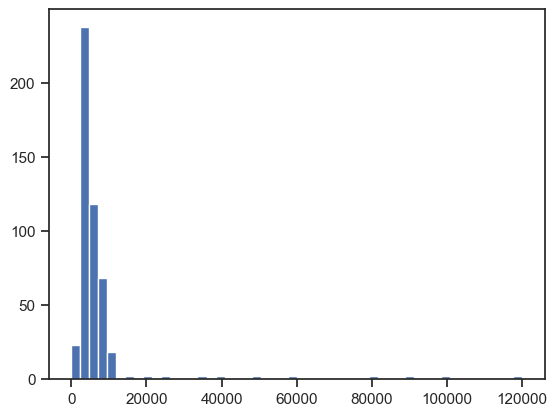

In [72]:
plt.hist(df['Monthly Income'], 50)
plt.show()

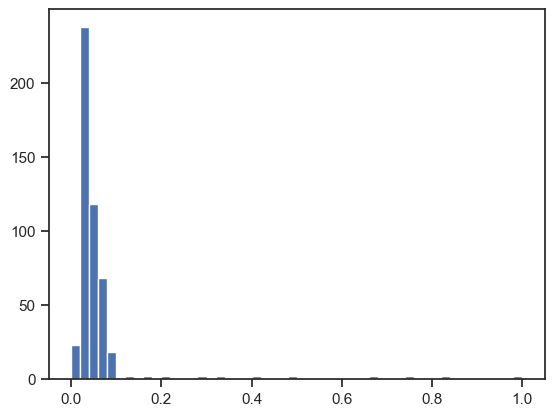

In [73]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки 

In [75]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(df[['Monthly Income']])

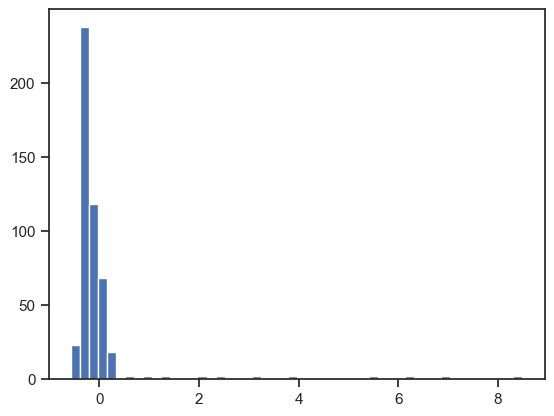

In [76]:
plt.hist(sc2_data, 50)
plt.show()